In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = './data/ex7data2.mat'
data = loadmat(path)
X = data['X']
X.shape

(300, 2)

In [3]:
K = 3
init_centroids = np.array([[3, 3], [6, 2], [8, 5]]) # 初始化聚类中心

In [4]:
def plot_data(X, centroids,idx=None):
    m = X.shape[0]
    k = init_centroids.shape[0]
    new_X = []
    
    if idx is None:
        new_X = [X]
    else:
        for i in range(k):
            new_X.append(np.array([X[j, :] for j in range(m) if idx[j]==i]))
            
    # 绘制各个类的散点图        
    plt.figure(figsize=(7, 6))
    for i in range(len(new_X)):
        nx = new_X[i]
        plt.scatter(nx[:, 0], nx[:, 1], marker='o', label=f'Cluster {i}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    
    # 绘制簇中心的变化曲线
    tx = []
    ty = []
    for c in centroids:
        tx.append(c[:, 0]) # 第一列x1
        ty.append(c[:, 1]) # 第二列x2

    for i in  range(len(tx[0])):
        plt.plot(tx, ty, '-kx', markersize=7, markeredgewidth=2) # (x1, x2)在list中按行对应

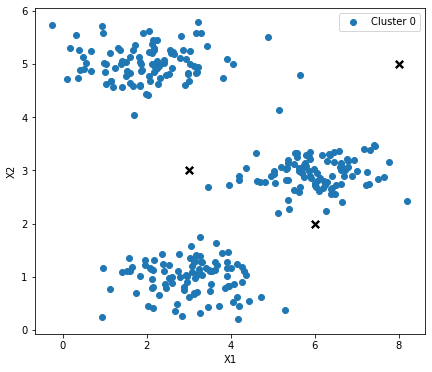

In [5]:
plot_data(X, [init_centroids], idx=None)

In [6]:
# 计算每个样本到每个簇中心的距离，从而将样本分配给距离最近的簇
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        dis = np.zeros(k)
        for j in range(k):
            dis[j] = np.sum((X[i, :] - centroids[j, :])  ** 2)  # 计算当前点距离其他簇的距离
        idx[i] = np.argmin(dis) # 返回向量dis最小元素的下标
        
    return idx

In [7]:
idx = find_closest_centroids(X, init_centroids)
idx[0:3] # 下标从0开始，区别于octave中从1开始

array([0., 2., 1.])

In [8]:
# 计算簇的中心-某一簇对应样本的平均值
def compute_centroids(X, idx, K):
    new_X = []
    for i in range(K):
        new_X.append(np.array([X[j, :] for j in range(len(idx)) if idx[j]==i]))
    return np.array([np.mean(xi, axis=0) for xi in new_X])
    
compute_centroids(X, idx, K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
# K-means algorithm 
def run_kmeans(X, init_centroids, K, iters):
    centroids_cords = []
    centroids_cords.append(init_centroids)
    centroids = init_centroids
    for i in range(iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        
        centroids_cords.append(centroids)
    return idx, centroids_cords

In [10]:
# 执行K-means，获得各个簇和簇中心的改变记录
idx, centroids_cords = run_kmeans(X, init_centroids, K=3, iters=10)

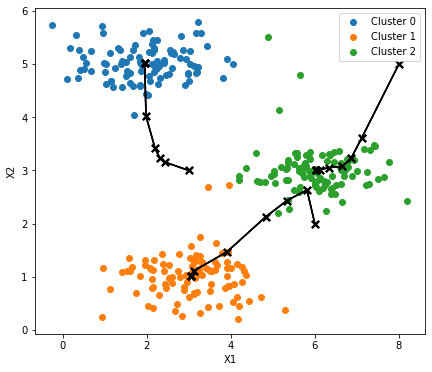

In [11]:
# 绘制聚类之后的图
plot_data(X, centroids_cords,idx=idx)

In [12]:
# 随机选择簇中心
def random_centroids(X, K):
    idx = np.random.randint(X.shape[0], size=K)
    return X[idx, :]

In [13]:
init_centroids = random_centroids(X, K)
init_centroids

array([[5.38736041, 2.26737346],
       [6.44765183, 3.16560945],
       [4.08164951, 0.87200343]])

In [14]:
# Image compression with K-means

(<matplotlib.image.AxesImage at 0x7fda4bdd7b80>, (128, 128, 3))

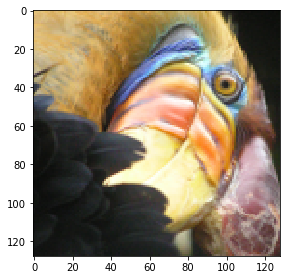

In [15]:
from skimage import io
path_image = './data/bird_small.png'
A = io.imread(path_image)
io.imshow(A), A.shape

In [16]:
A = A / 255 # 归一化

X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # (128, 128, 3) -> (16384, 3)

X.shape

(16384, 3)

In [17]:
K = 16 # 将所有的颜色聚类为16类

In [18]:
init_centroids = random_centroids(X, K) # 随机初始化
 
idx, centroids_cords = run_kmeans(X, init_centroids, K, iters=10) # 执行K-means算法
 
final_centroids = centroids_cords[-1] 

idx = find_closest_centroids(X, final_centroids)  # 根据最后的centroids对样本进行分类

In [19]:
# 压缩图片，将每个像素的颜色改为对应的16色
final_image = np.zeros((idx.shape[0], 3))

for i in range(idx.shape[0]):
    final_image[i] = final_centroids[int(idx[i])]

final_image = np.reshape(final_image, A.shape)
final_image.shape

(128, 128, 3)

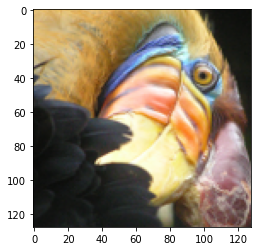

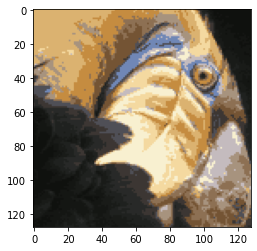

In [20]:
# 压缩前图片
plt.figure()
plt.imshow(A)

# 压缩后图片
plt.figure()
plt.imshow(final_image)

In [21]:
# 使用sklearn中的KMeans实现图片压缩
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [22]:
model.fit(X)

KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [23]:
final_centroids = model.cluster_centers_
final_image = model.predict(X)

final_centroids.shape, final_image.shape

((16, 3), (16384,))

In [24]:
final_image = final_centroids[final_image].reshape(A.shape)
final_image.shape

(128, 128, 3)

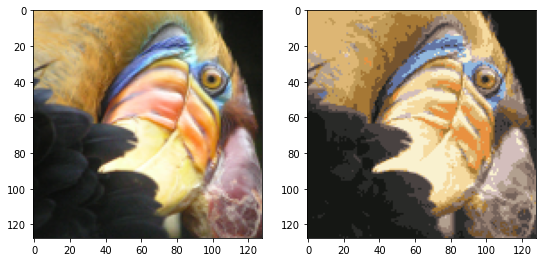

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(9, 8))
ax[0].imshow(A)
ax[1].imshow(final_image)